## imports and background things - not interesting

In [2]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ''

REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))

from particle import Particle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Generate Histograms

### Load the metadata info from csv file(s)

In [3]:

if False:
    left_sets = ['delta', 'rho']
    right_sets = ['JZ2',"JZ3","JZ4"]
    metadata = pd.read_csv("/home/jhimmens/workspace/jetpointnet/visualizations/rev_4/collected_data/PointNet_best_name=proud-dragon-942.keras/meta_results/metadata.csv")
    # Filter the data for LEFT and RIGHT
    metadata_left = metadata[metadata['set_name'].isin(left_sets)]
    metadata_right = metadata[metadata['set_name'].isin(right_sets)]
    left_description = "delta+rho direct"
    right_description = "mid dijet extrap"
else:
    left_sets = ['delta', 'rho']
    right_sets = ['JZ2',"JZ3","JZ4"]
    metadata_left = pd.read_csv("/home/jhimmens/workspace/jetpointnet/visualizations/rev_4/collected_data/PointNet_best_name=proud-dragon-942.keras/meta_results/metadata.csv")
    metadata_left = metadata_left[metadata_left['set_name'].isin(left_sets)]
    metadata_right = pd.read_csv("/home/jhimmens/workspace/jetpointnet/visualizations/rev_4/collected_data/PointNet_best_name=valiant-plasma-941.keras/meta_results/metadata.csv")
    metadata_right = metadata_right[metadata_right['set_name'].isin(right_sets)]
    left_description = 'delta and rho sets' 
    right_description = 'dijets 2-4' 


left_n_events = len(metadata_left)
right_n_events = len(metadata_right)

FIG_SIZE=(15, 5)

### Generate Graphs from the metadata

In [4]:
def calc_random_f1_score_old(metadata):
    n_cells = np.sum(metadata['n_cells'])
    n_true_positive = np.sum(metadata['truth_attributions'])
    n_true_negative = n_cells - n_true_positive

def calc_random_f1_score(metadata):
    n_cells = np.sum(metadata['n_cells'])
    n_true_positive = np.sum(metadata['truth_attributions'])
    
    # Calculate the rate of positive predictions
    rate_of_positive = n_true_positive / n_cells
    
    # Expected true positives (TP)
    TP = rate_of_positive * n_true_positive
    
    # Expected false positives (FP) and false negatives (FN)
    FP = rate_of_positive * (n_cells - n_true_positive)
    FN = (1 - rate_of_positive) * n_true_positive
    
    # Calculate Precision and Recall
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Calculate F1 Score
    if Precision + Recall == 0:
        F1 = 0
    else:
        F1 = 2 * (Precision * Recall) / (Precision + Recall)
    
    return F1

def calc_f1_score(metadata):
    tp_masked = np.sum(np.array(metadata['num_true_positives']))
    fp_masked = np.sum(np.array(metadata['num_false_positives']))
    # tn_masked = sum(np.array(metadata['num_true_negatives']))
    fn_masked = np.sum(np.array(metadata['num_false_negatives']))
    return (2 * tp_masked)/(2*tp_masked+fp_masked+fn_masked)

def calculate_dumb_accuracy(metadata):
    return np.sum(np.array(metadata['dumb_accuracy']) * np.array(metadata['n_cells']))/np.sum(np.array(metadata['n_cells']))

def calculate_random_accuracy(metadata):
    return np.max([np.sum(metadata['num_true_positives'] + metadata['num_false_negatives']), 
                  np.sum(metadata['num_true_negatives'] + metadata['num_false_positives'])]) / np.sum(metadata['n_cells'])


def calculate_accuracy(metadata):
    return np.sum(np.array(metadata['accuracy']) * np.array(metadata['n_cells']))/np.sum(np.array(metadata['n_cells']))

def calc_stats(metadata, set_description):
    print(f"{set_description}:")
    print(f"\tF1 score: {calc_f1_score(metadata):.2f}")
    print(f"\tRandom F1 score: {calc_random_f1_score(metadata):.2f}")
    print(f"\tAccuracy: {calculate_accuracy(metadata):.2f}")
    print(f"\tDumb Model Accuracy: {calculate_dumb_accuracy(metadata):.2f}")
    print(f"\tRandom Model Accuracy: {calculate_random_accuracy(metadata):.2f}")

In [5]:
calc_stats(metadata_left, left_description)
calc_stats(metadata_right, right_description)

delta and rho sets:
	F1 score: 0.78
	Random F1 score: 0.37
	Accuracy: 0.83
	Dumb Model Accuracy: 0.82
	Random Model Accuracy: 0.63
dijets 2-4:
	F1 score: 0.28
	Random F1 score: 0.06
	Accuracy: 0.93
	Dumb Model Accuracy: 0.94
	Random Model Accuracy: 0.94


In [6]:
metadata_left

,Unnamed: 0,set_name,track_ID,total_truth_track_E,total_real_E,track_pt,total_truth_energy,activated_energy,ideal_activation_energy,truth_attributions,...,hamming_loss,false_positive_rate,false_negative_rate,true_positive_rate,true_negative_rate,positive_predictive_value,false_discovery_rate,false_omission_rate,negative_predictive_value,threat_score
30000,30000,rho,0,384.957100,545.621030,93.389340,384.957100,315.350560,349.566960,171,...,0.186722,0.142857,0.204678,0.795322,0.857143,0.931507,0.068493,0.368421,0.631579,0.751381
30001,30001,rho,0,3.458256,433.876740,967.557500,3.458256,0.000000,3.397623,8,...,0.035242,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.035242,0.964758,0.000000
30002,30002,rho,0,273.798520,290.659500,183.168700,273.798520,284.787870,264.331100,134,...,0.219008,0.453704,0.029851,0.970149,0.546296,0.726257,0.273743,0.063492,0.936508,0.710383
30003,30003,rho,0,1354.625500,1304.497300,247.510570,1354.625500,1178.597000,1158.694200,83,...,0.149701,0.238095,0.060241,0.939759,0.761905,0.795918,0.204082,0.072464,0.927536,0.757282
30004,30004,rho,0,89.393190,92.211590,18.126427,89.393190,92.211590,92.112500,72,...,0.013699,1.000000,0.000000,1.000000,0.000000,0.986301,0.013699,0.000000,0.000000,0.986301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,delta,0,3.656084,24.000748,4.793080,3.656084,0.116812,3.450614,22,...,0.175000,0.000000,0.954545,0.045455,1.000000,1.000000,0.000000,0.176471,0.823529,0.045455
49996,49996,delta,0,719.976440,1105.505400,246.320080,719.976440,1105.505400,607.464600,57,...,0.313253,1.000000,0.000000,1.000000,0.000000,0.686747,0.313253,0.000000,0.000000,0.686747
49997,49997,delta,1,634.542360,1102.450400,136.090160,634.542360,726.996340,497.774800,25,...,0.350000,0.218182,0.640000,0.360000,0.781818,0.428571,0.571429,0.271186,0.728814,0.243243
49998,49998,delta,0,0.000000,1514.449300,7316.780000,0.000000,1098.571800,0.000000,0,...,0.992606,0.992606,0.000000,0.000000,0.007394,0.000000,1.000000,0.000000,1.000000,0.000000


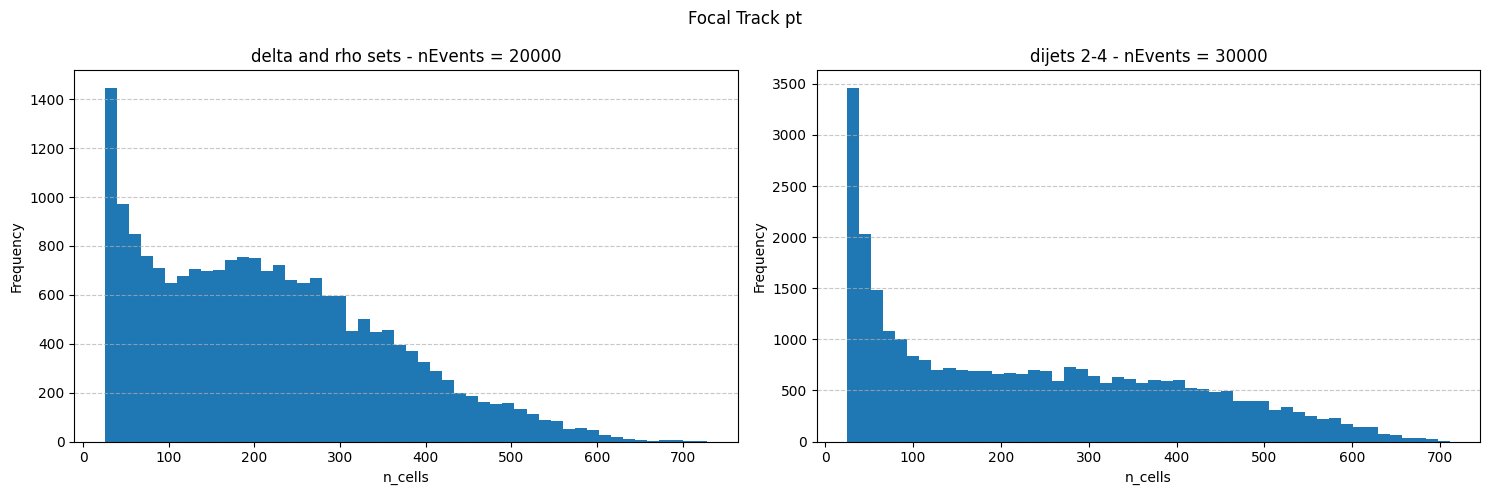

<Figure size 640x480 with 0 Axes>

In [21]:
plot_data = 'n_cells'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle('Focal Track pt')

# Plot for LEFT
axs[0].hist(metadata_left[plot_data], bins=50, label="track_pt")
axs[0].set_title(f'{left_description} - nEvents = {left_n_events}')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
#axs[0].set_yscale('log')
axs[0].set_xlabel(plot_data)
axs[0].set_ylabel('Frequency')

# Plot for RIGHT
axs[1].hist(metadata_right[plot_data], bins=50, label="track_pt")
axs[1].set_title(f'{right_description} - nEvents = {right_n_events}')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
#axs[1].set_yscale('log')
axs[1].set_xlabel(plot_data)
axs[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
plt.clf()

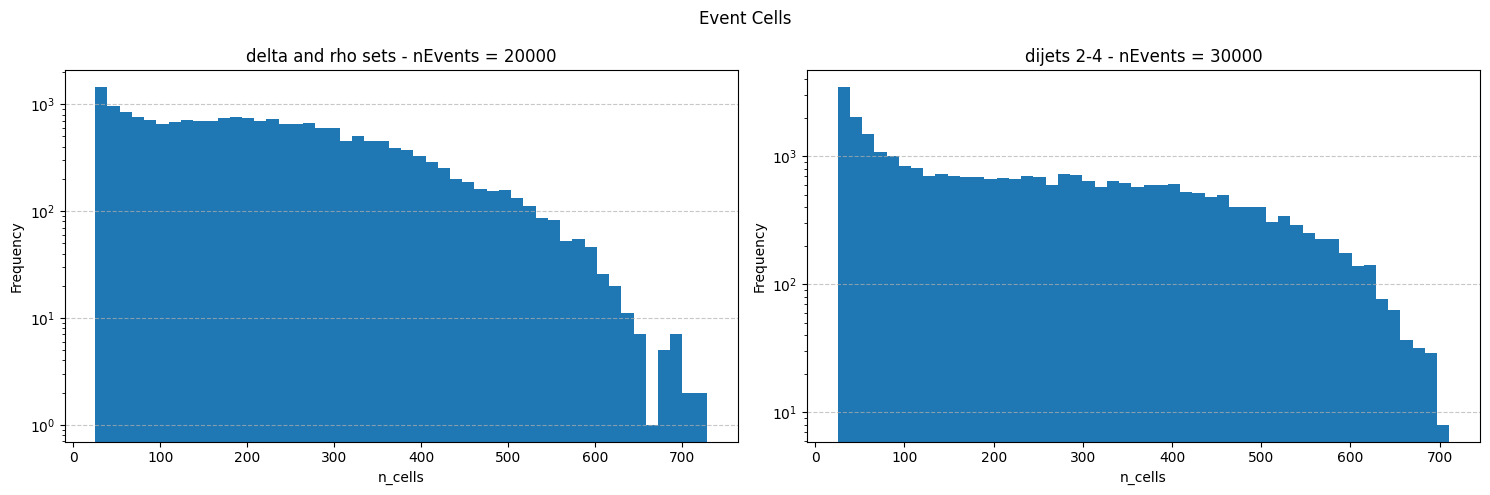

<Figure size 640x480 with 0 Axes>

In [8]:
plot_data = 'n_cells'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("Event Cells")
# Plot for LEFT
axs[0].hist(metadata_left[plot_data], bins=50, label="track_pt")
axs[0].set_title(f'{left_description} - nEvents = {left_n_events}')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_yscale('log')
axs[0].set_xlabel(plot_data)
axs[0].set_ylabel('Frequency')

# Plot for RIGHT
axs[1].hist(metadata_right[plot_data], bins=50, label="track_pt")
axs[1].set_title(f'{right_description} - nEvents = {right_n_events}')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_yscale('log')
axs[1].set_xlabel(plot_data)
axs[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
plt.clf()

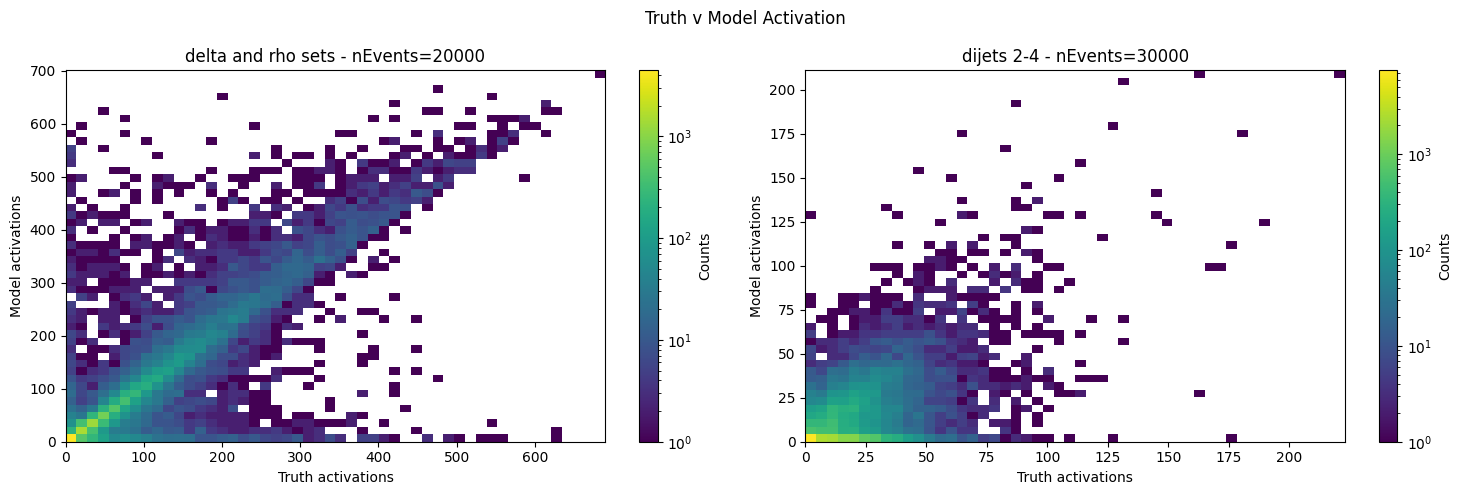

<Figure size 640x480 with 0 Axes>

In [9]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("Truth v Model Activation")
# Plot for LEFT
_, _, _, im_left = axs[0].hist2d(metadata_left['truth_attributions'], metadata_left['model_attributions'], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}')
axs[0].set_xlabel('Truth activations')
axs[0].set_ylabel('Model activations')
#axs[0].colorbar(label='Counts')
fig.colorbar(im_left, ax=axs[0], label='Counts')

# Plot for RIGHT
_, _, _, im_right = axs[1].hist2d(metadata_right['truth_attributions'], metadata_right['model_attributions'], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}')
axs[1].set_xlabel('Truth activations')
axs[1].set_ylabel('Model activations')
fig.colorbar(im_right, ax=axs[1], label='Counts')

plt.tight_layout()
plt.show()
plt.clf()

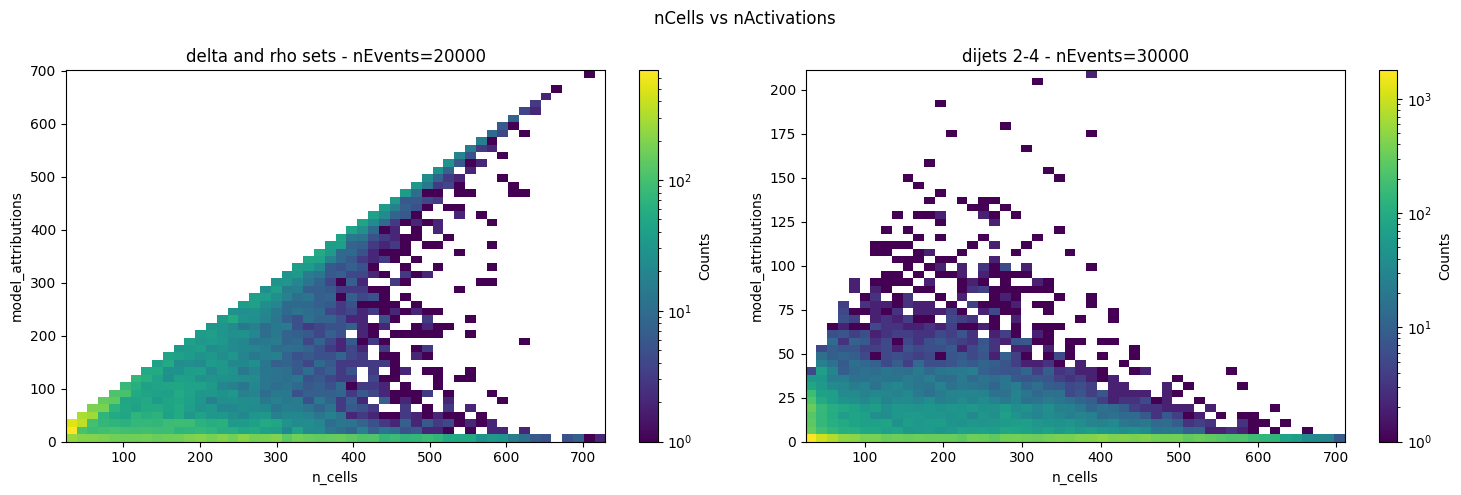

<Figure size 640x480 with 0 Axes>

In [10]:
x_data = 'n_cells'
y_data = 'model_attributions'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("nCells vs nActivations")
# Plot for LEFT
_, _, _, im_left = axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}')
axs[0].set_xlabel(x_data)
axs[0].set_ylabel(y_data)
#axs[0].colorbar(label='Counts')
fig.colorbar(im_left, ax=axs[0], label='Counts')

# Plot for RIGHT
_, _, _, im_right = axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}')
axs[1].set_xlabel(x_data)
axs[1].set_ylabel(y_data)
fig.colorbar(im_right, ax=axs[1], label='Counts')

plt.tight_layout()
plt.show()
plt.clf()

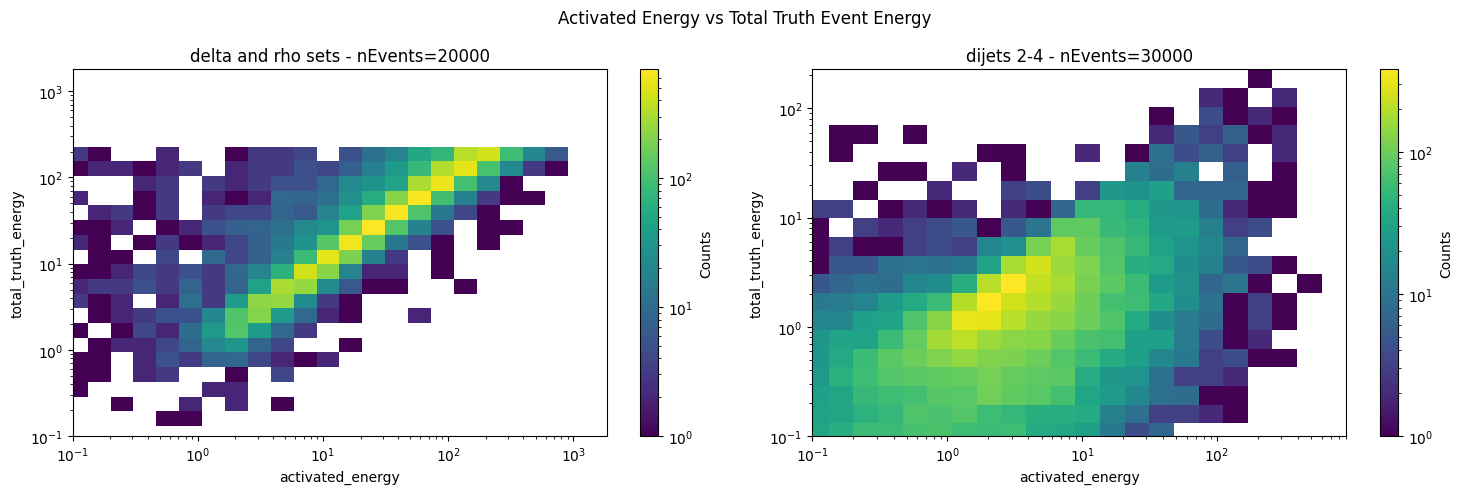

<Figure size 640x480 with 0 Axes>

In [11]:
x_data = 'activated_energy'
y_data = 'total_truth_energy'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("Activated Energy vs Total Truth Event Energy")

x_bins_left = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[x_data])), 50)
y_bins_left = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[y_data])), 50)

# Plot for LEFT
_, _, _, im_left = axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=[x_bins_left, y_bins_left], cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}')
axs[0].set_xlabel(x_data)
axs[0].set_ylabel(y_data)
axs[0].set_xlim([0.1, np.max(metadata_left[x_data])])
axs[0].set_ylim([0.1, np.max(metadata_left[y_data])])
axs[0].set_xscale('log')
axs[0].set_yscale('log')
fig.colorbar(im_left, ax=axs[0], label='Counts')

x_bins_right = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[x_data])), 50)
y_bins_right = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[y_data])), 50)

# Plot for RIGHT
_, _, _, im_right = axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=[x_bins_right, y_bins_right], cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}')
axs[1].set_xlabel(x_data)
axs[1].set_ylabel(y_data)
axs[1].set_xlim([0.1, np.max(metadata_right[x_data])])
axs[1].set_ylim([0.1, np.max(metadata_right[y_data])])
axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.colorbar(im_right, ax=axs[1], label='Counts')

plt.tight_layout()
plt.show()
plt.clf()

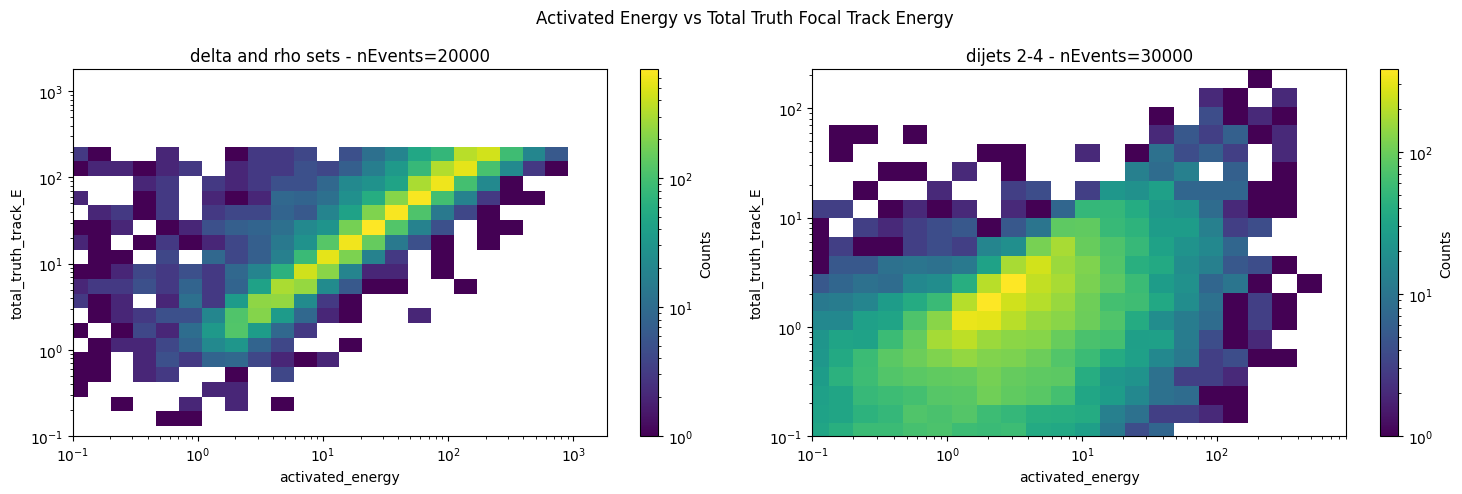

<Figure size 640x480 with 0 Axes>

In [12]:
x_data = 'activated_energy'
y_data = 'total_truth_track_E'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("Activated Energy vs Total Truth Focal Track Energy")
x_bins_left = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[x_data])), 50)
y_bins_left = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[y_data])), 50)

# Plot for LEFT
_, _, _, im_left = axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=[x_bins_left, y_bins_left], cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}')
axs[0].set_xlabel(x_data)
axs[0].set_ylabel(y_data)
axs[0].set_xlim([0.1, np.max(metadata_left[x_data])])
axs[0].set_ylim([0.1, np.max(metadata_left[y_data])])
axs[0].set_xscale('log')
axs[0].set_yscale('log')
fig.colorbar(im_left, ax=axs[0], label='Counts')

x_bins_right = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[x_data])), 50)
y_bins_right = np.logspace(np.log10(1e-6), np.log10(np.max(metadata_right[y_data])), 50)

# Plot for RIGHT
_, _, _, im_right = axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=[x_bins_right, y_bins_right], cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}')
axs[1].set_xlabel(x_data)
axs[1].set_ylabel(y_data)
axs[1].set_xlim([0.1, np.max(metadata_right[x_data])])
axs[1].set_ylim([0.1, np.max(metadata_right[y_data])])
axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.colorbar(im_right, ax=axs[1], label='Counts')

plt.tight_layout()
plt.show()
plt.clf()

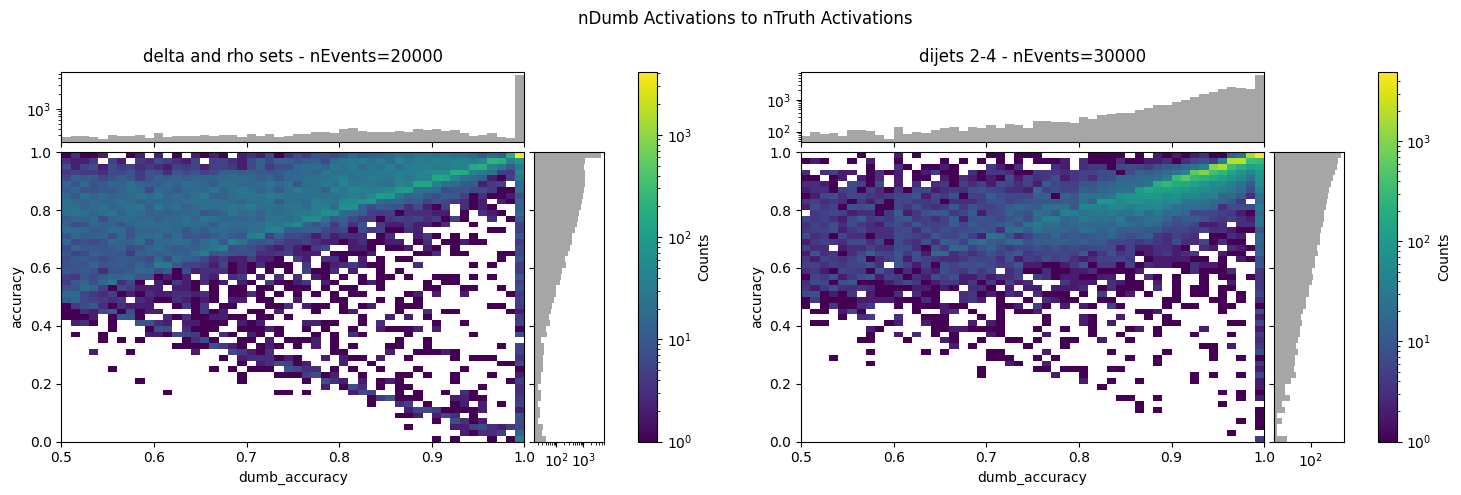

<Figure size 640x480 with 0 Axes>

In [13]:
x_data = 'dumb_accuracy'
y_data = 'accuracy'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("nDumb Activations to nTruth Activations")

# Plot for LEFT
_, _, _, im = axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}', pad=65)
axs[0].set_xlabel(x_data)
axs[0].set_ylabel(y_data)
fig.colorbar(im, ax=axs[0], label='Counts')

divider = make_axes_locatable(axs[0])
ax_histx = divider.append_axes("top", 0.7, pad=0.1, sharex=axs[0])
ax_histy = divider.append_axes("right", 0.7, pad=0.1, sharey=axs[0])

ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(metadata_left[x_data], bins=50, color='gray', alpha=0.7, log=True)
ax_histy.hist(metadata_left[y_data], bins=50, orientation='horizontal', color='gray', alpha=0.7, log=True)

# Plot for RIGHT
_, _, _, im = axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}', pad=65)
axs[1].set_xlabel(x_data)
axs[1].set_ylabel(y_data)
fig.colorbar(im, ax=axs[1], label='Counts')

divider = make_axes_locatable(axs[1])
ax_histx = divider.append_axes("top", 0.7, pad=0.1, sharex=axs[1])
ax_histy = divider.append_axes("right", 0.7, pad=0.1, sharey=axs[1])

ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(metadata_right[x_data], bins=50, color='gray', alpha=0.7, log=True)
ax_histy.hist(metadata_right[y_data], bins=50, orientation='horizontal', color='gray', alpha=0.7, log=True)

plt.tight_layout()
plt.show()
plt.clf()

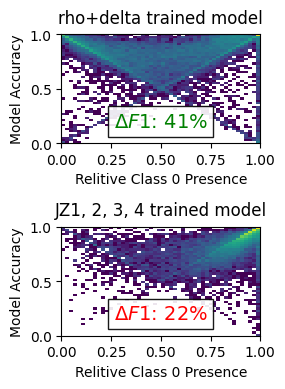

In [22]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(3, 4))
# fig.suptitle('Event Occupancy rate')


x_data = 'negative_dumb_accuracy'
y_data = 'accuracy'


# Plot for LEFT
axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'rho+delta trained model', pad=8)
# axs[0].grid(axis='y', linestyle='--', alpha=0.7)
# axs[0].set_yscale('log')
# axs[0].set_xlim(0,2)
axs[0].set_xlabel('Relitive Class 0 Presence')
axs[0].set_ylabel('Model Accuracy')
# axs[0].text(0.5, 0.8, f"Improvment: {(np.mean(metadata_left['accuracy']/metadata_left['dumb_accuracy']) - 1) * 100:.2f}%", transform=axs[0].transAxes,
#          fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

axs[0].text(0.5, 0.2, f"$\Delta F1$: { (calc_f1_score(metadata_left) - calc_random_f1_score(metadata_left)) * 100 :.0f}%", transform=axs[0].transAxes,
         fontsize=14, color='green', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9))


# Plot for RIGHT
axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'JZ1, 2, 3, 4 trained model', pad=8)
# axs[1].grid(axis='y', linestyle='--', alpha=0.7)
# axs[1].set_yscale('log')
# axs[1].set_xlim(0,2)
axs[1].set_xlabel('Relitive Class 0 Presence')
axs[1].set_ylabel('Model Accuracy')
axs[1].text(0.5, 0.2, f"$\Delta F1$: { (calc_f1_score(metadata_right) - calc_random_f1_score(metadata_right)) * 100 :.0f}%", transform=axs[1].transAxes,
          fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9))

fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1, hspace=0.4)
# Adjust layout and show the plots
fig.tight_layout()
fig.savefig("EvetImageF1.png", dpi=800, transparent=True, bbox_inches='tight')
fig.show()

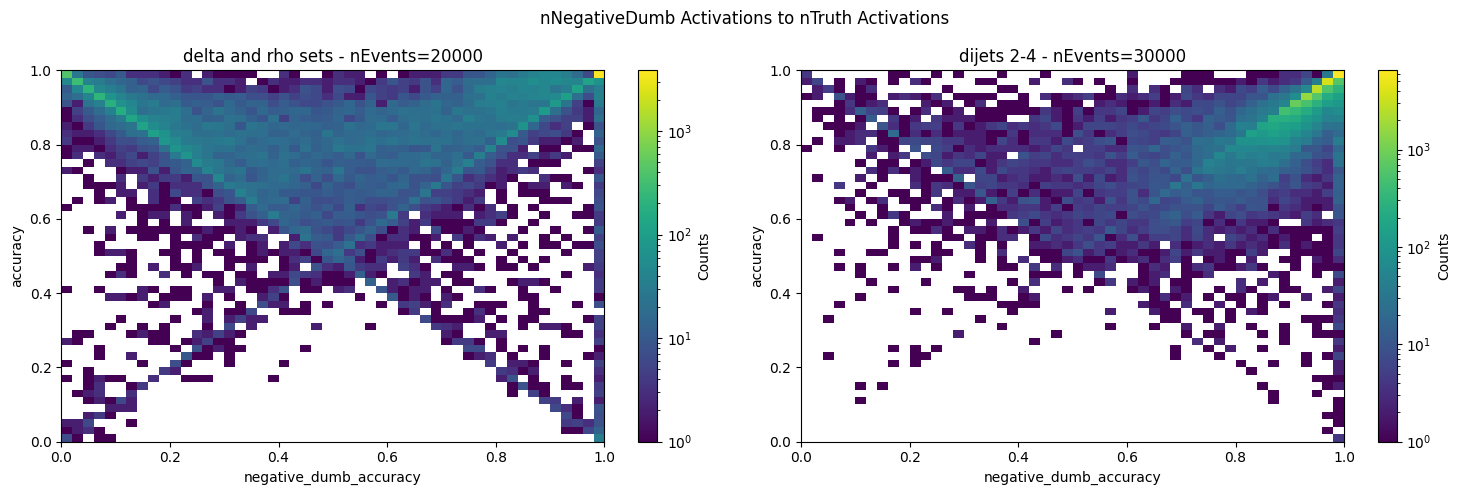

<Figure size 640x480 with 0 Axes>

In [15]:
x_data = 'negative_dumb_accuracy'
y_data = 'accuracy'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle("nNegativeDumb Activations to nTruth Activations")
# Plot for LEFT
_, _, _, im_left = axs[0].hist2d(metadata_left[x_data], metadata_left[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'{left_description} - nEvents={left_n_events}')
axs[0].set_xlabel(x_data)
axs[0].set_ylabel(y_data)
#axs[0].colorbar(label='Counts')
fig.colorbar(im_left, ax=axs[0], label='Counts')

# Plot for RIGHT
_, _, _, im_right = axs[1].hist2d(metadata_right[x_data], metadata_right[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'{right_description} - nEvents={right_n_events}')
axs[1].set_xlabel(x_data)
axs[1].set_ylabel(y_data)
fig.colorbar(im_right, ax=axs[1], label='Counts')

plt.tight_layout()
plt.show()
plt.clf()

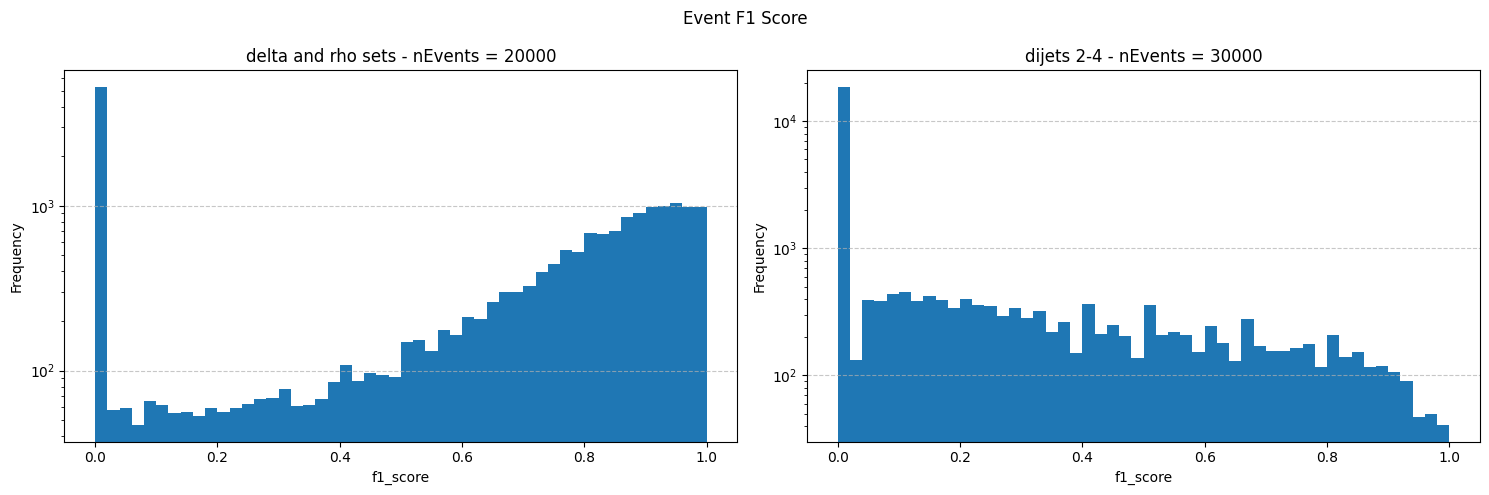

<Figure size 640x480 with 0 Axes>

In [16]:
plot_data = 'f1_score'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)
fig.suptitle('Event F1 Score')

# Plot for LEFT
axs[0].hist(metadata_left[plot_data], bins=50, label="track_pt")
axs[0].set_title(f'{left_description} - nEvents = {left_n_events}')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_yscale('log')
axs[0].set_xlabel(plot_data)
axs[0].set_ylabel('Frequency')

# Plot for RIGHT
axs[1].hist(metadata_right[plot_data], bins=50, label="track_pt")
axs[1].set_title(f'{right_description} - nEvents = {right_n_events}')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_yscale('log')
axs[1].set_xlabel(plot_data)
axs[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
plt.clf()

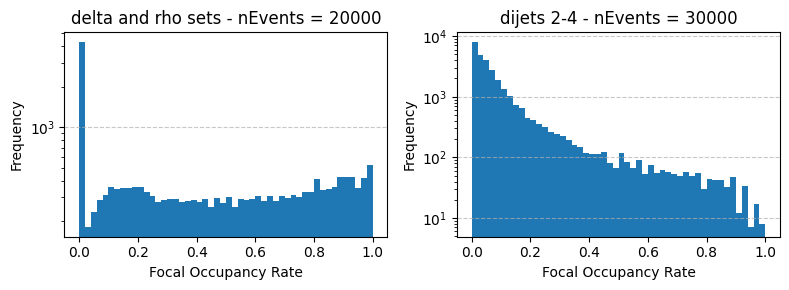

<Figure size 640x480 with 0 Axes>

In [17]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8,3))
#fig.suptitle('Focal Occupancy Rate')

# Plot for LEFT
axs[0].hist((metadata_left['num_true_positives'] + metadata_left['num_false_negatives'])/metadata_left['n_cells'], bins=50, label="track_pt")
axs[0].set_title(f'{left_description} - nEvents = {left_n_events}')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_yscale('log')
axs[0].set_xlabel('Focal Occupancy Rate')
axs[0].set_ylabel('Frequency')

# Plot for RIGHT
axs[1].hist((metadata_right['num_true_positives'] + metadata_right['num_false_negatives'])/metadata_right['n_cells'], bins=50, label="track_pt")
axs[1].set_title(f'{right_description} - nEvents = {right_n_events}')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_yscale('log')
axs[1].set_xlabel('Focal Occupancy Rate')
axs[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("occupancy.png", dpi=400, transparent=True)
plt.show()
plt.clf()

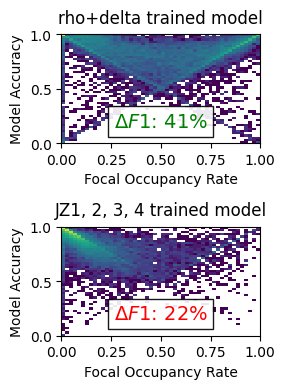

In [18]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(3, 4))
# fig.suptitle('Event Occupancy rate')


x_data = 'negative_dumb_accuracy'
y_data = 'accuracy'


# Plot for LEFT
axs[0].hist2d((metadata_left['num_true_positives'] + metadata_left['num_false_negatives'])/metadata_left['n_cells'], metadata_left[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[0].set_title(f'rho+delta trained model', pad=8)
# axs[0].grid(axis='y', linestyle='--', alpha=0.7)
# axs[0].set_yscale('log')
# axs[0].set_xlim(0,2)
axs[0].set_xlabel('Focal Occupancy Rate')
axs[0].set_ylabel('Model Accuracy')
# axs[0].text(0.5, 0.8, f"Improvment: {(np.mean(metadata_left['accuracy']/metadata_left['dumb_accuracy']) - 1) * 100:.2f}%", transform=axs[0].transAxes,
#          fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

axs[0].text(0.5, 0.2, f"$\Delta F1$: { (calc_f1_score(metadata_left) - calc_random_f1_score(metadata_left)) * 100 :.0f}%", transform=axs[0].transAxes,
         fontsize=14, color='green', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9))


# Plot for RIGHT
axs[1].hist2d((metadata_right['num_true_positives'] + metadata_right['num_false_negatives'])/metadata_right['n_cells'], metadata_right[y_data], bins=50, cmap='viridis', norm=LogNorm())
axs[1].set_title(f'JZ1, 2, 3, 4 trained model', pad=8)
# axs[1].grid(axis='y', linestyle='--', alpha=0.7)
# axs[1].set_yscale('log')
# axs[1].set_xlim(0,2)
axs[1].set_xlabel('Focal Occupancy Rate')
axs[1].set_ylabel('Model Accuracy')
axs[1].text(0.5, 0.2, f"$\Delta F1$: { (calc_f1_score(metadata_right) - calc_random_f1_score(metadata_right)) * 100 :.0f}%", transform=axs[1].transAxes,
          fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9))

fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1, hspace=0.4)
# Adjust layout and show the plots
fig.tight_layout()
fig.savefig("EvetImageF1.png", dpi=800, transparent=True, bbox_inches='tight')
fig.show()

# Science Week Plots

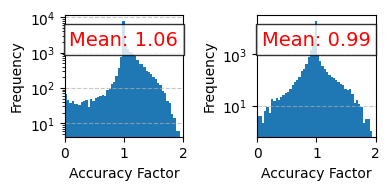

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(4, 2))
# fig.suptitle('Event Occupancy rate')

# Plot for LEFT
axs[0].hist(metadata_left['accuracy']/metadata_left['dumb_accuracy'], bins=50)
#axs[0].set_title(f'{left_description} - nEvents = {left_n_events}')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_yscale('log')
axs[0].set_xlim(0,2)
axs[0].set_xlabel('Accuracy Factor')
axs[0].set_ylabel('Frequency')
axs[0].text(0.5, 0.8, f"Mean: {np.mean(metadata_left['accuracy']/metadata_left['dumb_accuracy']):.2f}", transform=axs[0].transAxes,
         fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))


# Plot for RIGHT
axs[1].hist(metadata_right['accuracy']/metadata_right['dumb_accuracy'], bins=50)
#axs[1].set_title(f'{right_description} - nEvents = {right_n_events}')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_yscale('log')
axs[1].set_xlim(0,2)
axs[1].set_xlabel('Accuracy Factor')
axs[1].set_ylabel('Frequency')
axs[1].text(0.5, 0.8, f"Mean: {np.mean(metadata_right['accuracy']/metadata_right['dumb_accuracy']):.2f}", transform=axs[1].transAxes,
         fontsize=14, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("EvetImage200.png", dpi=800, transparent=True)
plt.show()